<a href="https://colab.research.google.com/github/mshinohar/langchain-book/blob/main/S%26P493_copy_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get yfinance ['Adj Close']

In [2]:
ticker_df = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

In [3]:
ticker_df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [4]:
tickers = ticker_df.Symbol.to_list()

In [6]:
tickers[0:5]

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN']

In [7]:
startDate = "2023-01-01"
endDate = '2023-12-8'

In [8]:
tickers = ['AOS','ABT','ABBV','ACN']

In [105]:
stock_prices = yf.download(tickers,start= startDate)['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [106]:
stock_prices.tail(3)

,ABBV,ABT,ACN,AOS
Date,,,,
2023-12-13,154.300003,107.250000,343.640015,79.529999
2023-12-14,154.880005,108.599998,342.730011,80.589996
2023-12-15,154.039993,107.290001,344.149994,79.199997


# market cap

In [11]:
apple = yf.Ticker("AAPL")
market_cap = apple.info['marketCap']
market_cap

3072766771200

In [ ]:
apple.info

In [14]:
def get_market_cap(tickers):
    market_caps = {}
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        market_caps[ticker] = stock.info['marketCap']
    return market_caps

In [107]:
market_caps = get_market_cap(tickers)
market_caps

{'ABBV': 271963766784,
 'ABT': 186261880832,
 'ACN': 215954128896,
 'AOS': 11778623488}

In [17]:
def plot_market_cap_change(market_caps):
    market_caps_df = pd.DataFrame(market_caps.items(), columns=['Ticker', 'MarketCap'])
    market_caps_df['PercentChange'] = market_caps_df['MarketCap'].pct_change() * 100
    market_caps_df.plot(x='Ticker', y='PercentChange', kind='bar')
    plt.show()

In [18]:
market_caps_df = pd.DataFrame(market_caps.items(), columns=['Ticker', 'MarketCap'])

In [19]:
market_caps_df

,Ticker,MarketCap
0,AOS,11778623488
1,ABT,186261880832
2,ABBV,271963766784
3,ACN,215954128896


In [ ]:
# Example usage:
# market_caps = get_market_cap(tickers)
plot_market_cap_change(market_caps)

# sharesOutstanding

In [20]:
# Step 4: Fetch Data and Step 5: Create DataFrame
def get_shares_outstanding(ticker):
    stock = yf.Ticker(ticker)
    return stock.info.get('sharesOutstanding', None)

In [21]:
shares_outstanding_data = {ticker: get_shares_outstanding(ticker) for ticker in tickers}

In [47]:
shares_outstanding_data

{'AOS': 122828000, 'ABT': 1736060032, 'ABBV': 1765539968, 'ACN': 626992000}

In [48]:
shares_outstanding_df = pd.DataFrame(list(shares_outstanding_data.items()), columns=['Ticker', 'SharesOutstanding'])

In [49]:
# Display the DataFrame
#print(shares_outstanding_df)
shares_outstanding_df

,Ticker,SharesOutstanding
0,AOS,122828000
1,ABT,1736060032
2,ABBV,1765539968
3,ACN,626992000


In [50]:
shares_outstanding_df_T = shares_outstanding_df.T
shares_outstanding_df_T

,0,1,2,3
Ticker,AOS,ABT,ABBV,ACN
SharesOutstanding,122828000,1736060032,1765539968,626992000


In [27]:
stock_prices_T = stock_prices.T
stock_prices_T

Date,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2023-12-04,2023-12-05,2023-12-06,2023-12-07,2023-12-08,2023-12-11,2023-12-12,2023-12-13,2023-12-14,2023-12-15
ABBV,156.074875,157.334030,157.141785,160.082977,155.382843,153.441284,151.067184,147.700226,149.039261,148.292114,...,144.149994,144.570007,146.380005,147.970001,149.279999,151.240005,153.240005,154.300003,154.880005,154.039993
ABT,107.430855,109.028885,108.626930,110.126923,109.950447,111.617096,110.930832,109.670265,111.787643,111.669456,...,105.190002,104.349998,104.940002,104.050003,104.510002,106.220001,106.680000,107.250000,108.599998,107.290001
ACN,266.033325,265.127716,258.867157,264.999725,269.468750,270.630310,277.815857,280.543793,278.863525,281.571716,...,336.429993,335.829987,335.410004,335.100006,337.230011,342.309998,343.220001,343.640015,342.730011,344.149994
AOS,57.854630,59.563171,58.306313,60.329060,60.378159,58.777634,61.448452,60.289791,61.006584,58.944561,...,77.089996,76.309998,77.279999,78.010002,77.989998,78.040001,79.480003,79.529999,80.589996,79.199997


In [86]:
#numpy.multiply(shares_outstanding_df, stock_prices_T)

In [26]:
import numpy as np

In [31]:
type(stock_prices)

pandas.core.frame.DataFrame

In [32]:
a = stock_prices.to_numpy()

In [33]:
type(a)

numpy.ndarray

In [37]:
a[0:3]

array([[156.07487488, 107.4308548 , 266.0333252 ,  57.85462952],
       [157.33403015, 109.02888489, 265.12771606,  59.56317139],
       [157.14178467, 108.62693024, 258.86715698,  58.30631256]])

In [96]:
shares_outstanding_df.sort_values('Ticker')

,Ticker,SharesOutstanding
2,ABBV,1765539968
1,ABT,1736060032
3,ACN,626992000
0,AOS,122828000


In [89]:
b1=shares_outstanding_df_T.drop("Ticker")
b1

,0,1,2,3
SharesOutstanding,122828000,1736060032,1765539968,626992000


In [98]:
so=shares_outstanding_df.sort_values('Ticker').set_index('Ticker')['SharesOutstanding']
so

Ticker
ABBV    1765539968
ABT     1736060032
ACN      626992000
AOS      122828000
Name: SharesOutstanding, dtype: int64

In [101]:
so.T.to_numpy()

array([1765539968, 1736060032,  626992000,  122828000])

In [110]:
stock_prices[0:3]

,ABBV,ABT,ACN,AOS
Date,,,,
2023-01-03,156.074890,107.430855,266.033325,57.854630
2023-01-04,157.334015,109.028877,265.127716,59.563171
2023-01-05,157.141785,108.626930,258.867157,58.306313


In [112]:
stock_prices.to_numpy()[0:3]

array([[156.07489014, 107.4308548 , 266.0333252 ,  57.85462952],
       [157.33401489, 109.02887726, 265.12771606,  59.56317139],
       [157.14178467, 108.62693024, 258.86715698,  58.30631256]])

In [113]:
#np.multiply(shares_outstanding_df, stock_prices_T)
#ans = np.multiply(shares_outstanding_df_T.drop("Ticker").T.to_numpy(), stock_prices_T.to_numpy())
#np.multiply(stock_prices, shares_outstanding_df)
mcap= np.multiply(so.T.to_numpy(), stock_prices.to_numpy())

In [114]:
type(mcap)

numpy.ndarray

In [117]:
mcap[0:3]

array([[2.75556457e+11, 1.86506413e+11, 1.66800767e+11, 7.10616843e+09],
       [2.77779492e+11, 1.89280676e+11, 1.66232957e+11, 7.31602522e+09],
       [2.77440101e+11, 1.88582872e+11, 1.62307636e+11, 7.16164776e+09]])

In [124]:
mcap_df = pd.DataFrame(data=mcap, index=stock_prices.index, columns=stock_prices.columns)

In [125]:
mcap_df.head(3)

,ABBV,ABT,ACN,AOS
Date,,,,
2023-01-03,2.755565e+11,1.865064e+11,1.668008e+11,7.106168e+09
2023-01-04,2.777795e+11,1.892807e+11,1.662330e+11,7.316025e+09
2023-01-05,2.774401e+11,1.885829e+11,1.623076e+11,7.161648e+09


In [ ]:
def plot_market_cap_change(market_caps):
    market_caps_df = pd.DataFrame(market_caps.items(), columns=['Ticker', 'MarketCap'])
    market_caps_df['PercentChange'] = market_caps_df['MarketCap'].pct_change() * 100
    market_caps_df.plot(x='Ticker', y='PercentChange', kind='bar')
    plt.show()

In [130]:
mcap_df_per = mcap_df.pct_change()*100
mcap_df_per

,ABBV,ABT,ACN,AOS
Date,,,,
2023-01-03,NaN,NaN,NaN,NaN
2023-01-04,0.806744,1.487489,-0.340412,2.953164
2023-01-05,-0.122180,-0.368661,-2.361337,-2.110127
2023-01-06,1.871671,1.380866,2.369002,3.469173
2023-01-09,-2.936052,-0.160240,1.686426,0.081385
...,...,...,...,...
2023-12-11,1.312973,1.636206,1.506386,0.064115
2023-12-12,1.322401,0.433063,0.265842,1.845211
2023-12-13,0.691724,0.534308,0.122374,0.062903


from matplotlib import pyplot as plt
mcap_df_per['ABBV'].plot(kind='hist', bins=20, title='ABBV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
mcap_df_per['ABT'].plot(kind='hist', bins=20, title='ABT')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
mcap_df_per['ACN'].plot(kind='hist', bins=20, title='ACN')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
mcap_df_per['AOS'].plot(kind='hist', bins=20, title='AOS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
mcap_df_per.plot(kind='scatter', x='ABBV', y='ABT', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
mcap_df_per.plot(kind='scatter', x='ABT', y='ACN', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
mcap_df_per.plot(kind='scatter', x='ACN', y='AOS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
mcap_df_per['ABBV'].plot(kind='line', figsize=(8, 4), title='ABBV')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
mcap_df_per['ABT'].plot(kind='line', figsize=(8, 4), title='ABT')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
mcap_df_per['ACN'].plot(kind='line', figsize=(8, 4), title='ACN')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
mcap_df_per['AOS'].plot(kind='line', figsize=(8, 4), title='AOS')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='Date'>

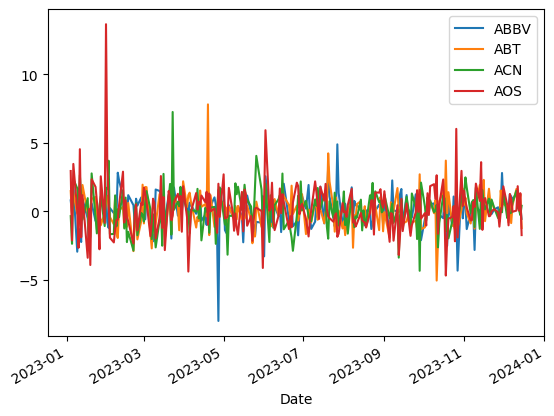

In [133]:
# market_caps_df.plot(x='Ticker', y='PercentChange', kind='bar')
mcap_df_per.plot()

# ABBV

In [66]:
tickers = ['ABBV','ABT','ACN','AOS']

In [70]:
shares_outstanding_df

,Ticker,SharesOutstanding
0,AOS,122828000
1,ABT,1736060032
2,ABBV,1765539968
3,ACN,626992000


In [71]:
shares_outstanding_df_T

,0,1,2,3
Ticker,AOS,ABT,ABBV,ACN
SharesOutstanding,122828000,1736060032,1765539968,626992000


In [75]:
shares_series = shares_outstanding_df.set_index('Ticker')['SharesOutstanding']
shares_series

Ticker
AOS      122828000
ABT     1736060032
ABBV    1765539968
ACN      626992000
Name: SharesOutstanding, dtype: int64

In [76]:
type(shares_series)

pandas.core.series.Series

In [79]:
stock_prices[0:3]

,ABBV,ABT,ACN,AOS
Date,,,,
2023-01-03,156.074875,107.430855,266.033325,57.854630
2023-01-04,157.334030,109.028885,265.127716,59.563171
2023-01-05,157.141785,108.626930,258.867157,58.306313


In [81]:
"""
shares_series = shares_outstanding_df.set_index(tickers)['SharesOutstanding']
# Multiply stock prices with shares outstanding
market_cap = stock_prices.mul(shares_outstanding_df, axis=0)
# Display the resulting DataFrame
print(market_cap)
"""
market_cap = stock_prices.mul(shares_series, axis=0)

# AAPL

In [82]:
import pandas as pd

# Example DataFrames
# DataFrame of stock prices (dates as index, tickers as columns)
stock_prices = pd.DataFrame({
    "AAPL": [150, 152, 153, 155],
    "MSFT": [250, 252, 251, 253],
    "GOOGL": [2700, 2720, 2710, 2730]
}, index=pd.date_range("2023-01-01", periods=4))

# DataFrame of shares outstanding (tickers and their shares outstanding)
shares_outstanding = pd.DataFrame({
    "Ticker": ["AAPL", "MSFT", "GOOGL"],
    "SharesOutstanding": [10000000, 20000000, 5000000]  # Example values
})

# Convert shares outstanding DataFrame to a Series with tickers as index
shares_series = shares_outstanding.set_index('Ticker')['SharesOutstanding']

# Multiply stock prices with shares outstanding
market_cap = stock_prices.mul(shares_series, axis='columns')

# Display the resulting DataFrame
print(market_cap)


                  AAPL        MSFT        GOOGL
2023-01-01  1500000000  5000000000  13500000000
2023-01-02  1520000000  5040000000  13600000000
2023-01-03  1530000000  5020000000  13550000000
2023-01-04  1550000000  5060000000  13650000000


In [83]:
stock_prices

,AAPL,MSFT,GOOGL
2023-01-01,150,250,2700
2023-01-02,152,252,2720
2023-01-03,153,251,2710
2023-01-04,155,253,2730


In [84]:
shares_outstanding

,Ticker,SharesOutstanding
0,AAPL,10000000
1,MSFT,20000000
2,GOOGL,5000000


In [85]:
shares_series

Ticker
AAPL     10000000
MSFT     20000000
GOOGL     5000000
Name: SharesOutstanding, dtype: int64

# AAPL MSFT

In [ ]:
def market_cap_data(ticker, startDate, endDate):
  hist_market_cap = df * shares_outstanding_df
  return hist_market_cap

In [ ]:
import pandas as pd

# Example DataFrames
# DataFrame of stock prices (dates as index, tickers as columns)
stock_prices = pd.DataFrame({
    "AAPL": [150, 152, 153, 155],
    "MSFT": [250, 252, 251, 253],
    "GOOGL": [2700, 2720, 2710, 2730]
}, index=pd.date_range("2023-01-01", periods=4))

# DataFrame of shares outstanding (tickers and their shares outstanding)
shares_outstanding = pd.DataFrame({
    "Ticker": ["AAPL", "MSFT", "GOOGL"],
    "SharesOutstanding": [10000000, 20000000, 5000000]  # Example values
})

# Convert shares outstanding DataFrame to a Series with tickers as index
shares_series = shares_outstanding.set_index('Ticker')['SharesOutstanding']

# Multiply stock prices with shares outstanding
market_cap = stock_prices.mul(shares_series, axis='columns')

# Display the resulting DataFrame
print(market_cap)


                  AAPL        MSFT        GOOGL
2023-01-01  1500000000  5000000000  13500000000
2023-01-02  1520000000  5040000000  13600000000
2023-01-03  1530000000  5020000000  13550000000
2023-01-04  1550000000  5060000000  13650000000


In [ ]:
def get_stock_data(ticker, startDate, endDate):
    stock = yf.Ticker(ticker)
    hist = stock.history(start=startDate, end=endDate)
    shares_outstanding = stock.info.get('sharesOutstanding', 1)  # Fallback to 1 if not available
    hist['MarketCap'] = hist['Close'] * shares_outstanding
    return hist['MarketCap']

# Creating a DataFrame with dates as index
market_cap_data = pd.DataFrame(index=pd.date_range(start=startDate, end=endDate))

# Fetching data for each ticker
for ticker in tickers:
    market_cap_data[ticker] = get_stock_data(ticker, startDate, endDate)

# Step 5 & 6: Display the DataFrame
print(market_cap_data)

            AOS  ABT  ABBV  ACN
2023-01-01  NaN  NaN   NaN  NaN
2023-01-02  NaN  NaN   NaN  NaN
2023-01-03  NaN  NaN   NaN  NaN
2023-01-04  NaN  NaN   NaN  NaN
2023-01-05  NaN  NaN   NaN  NaN
...         ...  ...   ...  ...
2023-12-04  NaN  NaN   NaN  NaN
2023-12-05  NaN  NaN   NaN  NaN
2023-12-06  NaN  NaN   NaN  NaN
2023-12-07  NaN  NaN   NaN  NaN
2023-12-08  NaN  NaN   NaN  NaN

[342 rows x 4 columns]


In [ ]:
market_cap_data('ABBV', startDate, endDate)

TypeError: ignored

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

def get_market_cap(tickers):
    market_caps = {}
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        market_caps[ticker] = stock.info['marketCap']
    return market_caps

def plot_market_cap_change(market_caps):
    market_caps_df = pd.DataFrame(market_caps.items(), columns=['Ticker', 'MarketCap'])
    market_caps_df['PercentChange'] = market_caps_df['MarketCap'].pct_change() * 100
    market_caps_df.plot(x='Ticker', y='PercentChange', kind='bar')
    plt.show()

# Example usage:
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", ...]  # Add all S&P 500 tickers
market_caps = get_market_cap(tickers)
plot_market_cap_change(market_caps)

# To remove certain tickers:
exclude_tickers = ["AAPL", "MSFT"]
new_tickers = [ticker for ticker in tickers if ticker not in exclude_tickers]
new_market_caps = get_market_cap(new_tickers)
plot_market_cap_change(new_market_caps)


AttributeError: ignored